In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 1000

df = pd.read_csv("mpls_crime_2017-2022.csv", encoding="utf-8")

In [ ]:
df.sample(n=5)

In [3]:
def cleanup_df(a_df):
    
    a_df = a_df.drop("neighborhoodCrimeStatisticsID", axis=1)
    a_df = a_df.loc[df["neighborhood"] != "Z_** NOT ASSIGNED **"]
    a_df = a_df.loc[df["neighborhood"] != "** NOT ASSIGNED **"]
    a_df["neighborhood"] = a_df["neighborhood"].replace("CARAG", "South Uptown")
    a_df["neighborhood"] = a_df["neighborhood"].replace("ECCO", "East Bde Maka Ska")
    a_df["neighborhood"] = a_df["neighborhood"].replace("WEST CALHOUN", "West Maka Ska")
    a_df["neighborhood"] = a_df.neighborhood.str.lower()
    a_df["neighborhood"] = a_df["neighborhood"].replace("stevens square - loring heights", "steven's square - loring heights")
    a_df["neighborhood"] = a_df["neighborhood"].replace("west calhoun", "west maka ska")
    
    return a_df
    

In [4]:
# Breakpoint

df = cleanup_df(df)
df = df.copy()
# df.sort_values(by="neighborhood")

In [5]:
# 480 data points for each neighborhood, accounting for name changes!

# df.neighborhood.value_counts()



In [6]:
# Mpls Neighborhood "Communities"

CALHOUN_ISLES = ["bryn - mawr", "cedar - isles - dean", "east bde maka ska", "east isles", "kenwood", "lowry hill", \
                 "lowry hill east", "south uptown", "west maka ska"]

CAMDEN = ["camden industrial", "cleveland", "folwell", "humboldt industrial area", "lind - bohanon", "mckinley", \
          "shingle creek", "victory", "webber - camden"]

CENTRAL = ["downtown east", "downtown west", "elliot park", "loring park", "north loop", "steven's square - loring heights"]

LONGFELLOW = ["cooper", "hiawatha", "howe", "longfellow", "seward"]

NEAR_NORTH = ["harrison", "hawthorne", "jordan", "near - north", "sumner - glenwood", "willard - hay"]

NOKOMIS = ["diamond lake", "ericsson", "field", "hale", "keewaydin", "minnehaha", "morris park", \
           "northrop", "page", "regina", "wenonah"]

NORTHEAST = ["audubon park", "beltrami", "bottineau", "columbia park", "holland", "logan park", "marshall terrace", \
             "northeast park", "sheridan", "st. anthony east", "st. anthony west", "waite park", "windom park"]

PHILLIPS = ["east phillips", "midtown phillips", "phillips west", "ventura village"]

POWDERHORN = ["bancroft", "bryant", "central", "corcoran", "lyndale", "powderhorn park", "standish", "whittier"]
 
SOUTHWEST = ["armatage", "east harriet", "fulton", "kenny", "king field", "linden hills", "lynnhurst", "tangletown", \
             "windom"]

UNIVERSITY = ["cedar riverside", "como", "marcy holmes", "mid - city industrial", "nicollet island - east bank", \
              "prospect park - east river road", "university of minnesota"]

In [7]:
# Make list of communities names, each a list of neighborhoods

COMMUNITIES = ["CALHOUN_ISLES", "CAMDEN", "CENTRAL", "LONGFELLOW", "NEAR_NORTH", "NOKOMIS", "NORTHEAST", \
              "PHILLIPS", "POWDERHORN", "SOUTHWEST", "UNIVERSITY"]

In [8]:
# As per FBI ucr reporting standards

violent_crimes = ["Aggravated Assault", "Homicide", "Rape", "Robbery"]

property_crimes = ["Arson", "Auto Theft", "Burglary", "Larceny"]

In [9]:
# Narrow down to just months and type of crime I'm interested in

before_violent = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]
before_violent = before_violent.sort_values(by=["neighborhood", "ucrDescription"])

before_violent = before_violent.drop(["reportMonth", "reportYear"], axis=1)

# before_violent

In [10]:
after_violent = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(violent_crimes)) ]
after_violent = after_violent.sort_values(by=["neighborhood", "ucrDescription"])

after_violent = after_violent.drop(["reportMonth", "reportYear"], axis=1)

# after_violent

In [11]:
before_property = df[ (df["reportMonth"]==5) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]
before_property = before_property.sort_values(by=["neighborhood", "ucrDescription"])

before_property = before_property.drop(["reportMonth", "reportYear"], axis=1)

# before_property

In [12]:
after_property = df[ (df["reportMonth"]==6) & (df["reportYear"]==2020) & (df["ucrDescription"].isin(property_crimes)) ]
after_property = after_property.sort_values(by=["neighborhood", "ucrDescription"])

after_property = after_property.drop(["reportMonth", "reportYear"], axis=1)

# after_property

In [13]:
CALH_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_bp = int(before_property.loc[ (before_property["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_bp = int(before_property.loc[ (before_property["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_bp = int(before_property.loc[ (before_property["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_bp = int(before_property.loc[ (before_property["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_bp = int(before_property.loc[ (before_property["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [14]:
CALH_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_ap = int(after_property.loc[ (after_property["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_ap = int(after_property.loc[ (after_property["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_ap = int(after_property.loc[ (after_property["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_ap = int(after_property.loc[ (after_property["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_ap = int(after_property.loc[ (after_property["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [15]:
CALH_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_bv = int(before_violent.loc[ (before_violent["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [16]:
CALH_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CALHOUN_ISLES)), : ].groupby("neighborhood").sum().sum())

CAMD_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CAMDEN)), : ].groupby("neighborhood").sum().sum())

CENT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(CENTRAL)), : ].groupby("neighborhood").sum().sum())

LONG_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(LONGFELLOW)), : ].groupby("neighborhood").sum().sum())

NEAR_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NEAR_NORTH)), : ].groupby("neighborhood").sum().sum())

NOKO_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NOKOMIS)), : ].groupby("neighborhood").sum().sum())

NORT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(NORTHEAST)), : ].groupby("neighborhood").sum().sum())

PHIL_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(PHILLIPS)), : ].groupby("neighborhood").sum().sum())

POWD_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(POWDERHORN)), : ].groupby("neighborhood").sum().sum())

SOUT_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(SOUTHWEST)), : ].groupby("neighborhood").sum().sum())

UNIV_av = int(after_violent.loc[ (after_violent["neighborhood"].isin(UNIVERSITY)), : ].groupby("neighborhood").sum().sum())


In [17]:
bp = [CALH_bp, CAMD_bp, CENT_bp, LONG_bp, NEAR_bp, NOKO_bp, NORT_bp, PHIL_bp, POWD_bp, SOUT_bp, UNIV_bp]
ap = [CALH_ap, CAMD_ap, CENT_ap, LONG_ap, NEAR_ap, NOKO_ap, NORT_ap, PHIL_ap, POWD_ap, SOUT_ap, UNIV_ap]

bv = [CALH_bv, CAMD_bv, CENT_bv, LONG_bv, NEAR_bv, NOKO_bv, NORT_bv, PHIL_bv, POWD_bv, SOUT_bv, UNIV_bv]
av = [CALH_av, CAMD_av, CENT_av, LONG_av, NEAR_av, NOKO_av, NORT_av, PHIL_av, POWD_av, SOUT_av, UNIV_av]

# COMMUNITIES is list of neighborhood communities for plotting

In [18]:
plot_df_prop = pd.DataFrame(index=COMMUNITIES, data={"Property_Before":bp, "Property_After":ap, "%_Chg": 0})
plot_df_viol = pd.DataFrame(index=COMMUNITIES, data={"Violent_Before":bv, "Violent_After":av, "%_Chg": 0})
   
plot_df_prop["%_Chg"] = ((plot_df_prop["Property_After"] - plot_df_prop["Property_Before"]) / plot_df_prop["Property_Before"]) * 100

plot_df_viol["%_Chg"] = ((plot_df_viol["Violent_After"] - plot_df_viol["Violent_Before"]) / plot_df_viol["Violent_Before"]) * 100



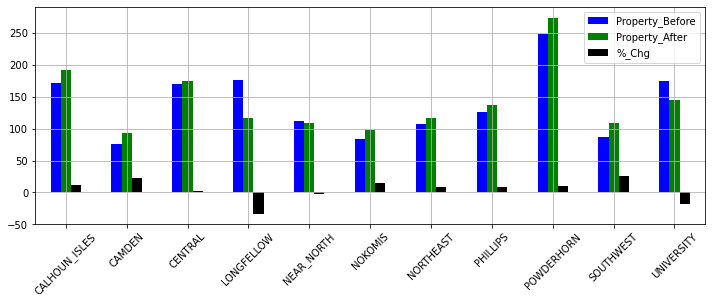

In [19]:
plot_df_prop.plot.bar(color=["blue","green","black"], figsize=(12,4))
plt.ylim(-50, 290)
plt.xticks(rotation=45)
plt.grid()


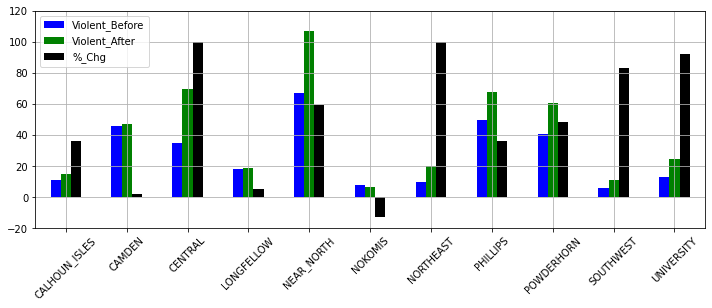

In [22]:
plot_df_viol.plot.bar(color=["blue","green","black"], figsize=(12,4))
plt.ylim(-20, 120)
plt.xticks(rotation=45)
plt.grid()


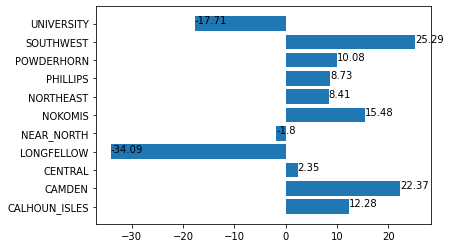

In [31]:

x = COMMUNITIES
y = plot_df_prop["%_Chg"]

plt.barh(x, y)
 
for index, value in enumerate(y):
    plt.text(round(value,2), index, str(round(value,2)))
 
plt.show()

In [ ]:
fig = plt.figure(figsize = (20, 5))


x_axis = np.arange(len(COMMUNITIES))

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, COMMUNITIES)

 # Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks

plt.bar(x_axis, bp, color='r', alpha=0.5, align="center", width=.1)


# Give our chart some labels and a tile

plt.title("Property Crime (before GF)")
plt.xlabel("Mpls Communities")
plt.ylabel("Number of Property Crimes")
plt.tight_layout()

plt.show()

In [ ]:
fig = plt.figure(figsize = (20, 5))


x_axis = np.arange(len(COMMUNITIES))

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, COMMUNITIES)

 # Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks

plt.bar(x_axis, ap, color='r', alpha=0.5, align="center", width=.1)


# Give our chart some labels and a tile

plt.title("Property Crime (after GF)")
plt.xlabel("Mpls Communities")
plt.ylabel("Number of Property Crimes")
plt.tight_layout()

plt.show()

In [ ]:
fig = plt.figure(figsize = (20, 5))


x_axis = np.arange(len(COMMUNITIES))

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, COMMUNITIES)

 # Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks

plt.bar(x_axis, bv, color='r', alpha=0.5, align="center", width=.1)


# Give our chart some labels and a tile

plt.title("Violent Crime (before GF)")
plt.xlabel("Mpls Communities")
plt.ylabel("Number of Violent Crimes")
plt.tight_layout()

plt.show()

In [ ]:
fig = plt.figure(figsize = (20, 5))

x_axis = np.arange(len(COMMUNITIES))

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, COMMUNITIES, rotation=45)

 # Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks

plt.bar(x_axis, av, color='r', alpha=0.5, align="edge")

# Give our chart some labels and a tile

plt.title("Violent Crime (after GF)")
plt.xlabel("Mpls Communities")
plt.ylabel("Number of Violent Crimes")
plt.tight_layout()

plt.show()

In [ ]:
fig = plt.figure(figsize = (20, 5))

x = COMMUNITIES
y1 = bp
y2 = ap
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.show()

In [ ]:
N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()

In [ ]:
team = COMMUNITIES
female = bp
male = ap

fig = plt.figure(figsize = (15, 5))
x_axis = np.arange(len(team))

# Multi bar Chart

plt.bar(x_axis, female, width=.2, label = 'BP', color="blue")
plt.bar(x_axis +.2, male, width=.2, label = 'AP', color="red")

# Xticks

plt.xticks(x_axis+.2/2, team)

# Add legend

plt.legend()

# Display

plt.grid()


plt.show()

In [ ]:
print(bp)
print(ap)


data = {"Before GF": bp, "After GF": ap}
df = pd.DataFrame(data, columns=["Before GF", "After GF"], index=COMMUNITIES)

print(df)
df.plot.barh()
plt.grid()
plt.show()

In [ ]:
data = {"Month Before GF": bv, "Month After GF": av}
df = pd.DataFrame(data, columns=["Month Before GF", "Month After GF"], index=COMMUNITIES)

df.plot.barh()
plt.grid()
plt.title("Violent Crime")
plt.show()

In [ ]:
data = {"Month Before GF": bp, "Month After GF": ap}
df = pd.DataFrame(data, columns=["Month Before GF", "Month After GF"], index=COMMUNITIES)

df.plot.barh()
plt.grid()
plt.title("Property Crime")
plt.show()

In [ ]:
data = {"Month Before GF": bp, "Month After GF": ap}
df = pd.DataFrame(data, columns=["Month Before GF", "Month After GF"], index=COMMUNITIES)

df.plot.box()
plt.grid()
plt.title("Property Crime")
plt.show()

In [ ]:
data = {"Month Before GF": bv, "Month After GF": av}
df = pd.DataFrame(data, columns=["Month Before GF", "Month After GF"], index=COMMUNITIES)

df.plot.box()
plt.grid()
plt.title("Violent Crime")
plt.show()

In [ ]:
st.ttest_ind(bp, ap, equal_var=False) 

In [ ]:
st.ttest_ind(bv, av, equal_var=False) 